('cost1 : ', 1944.7032905596802, 'cost2 : ', 681.723810877449)
('cost1 : ', 681.7161459273985, 'cost2 : ', 681.7161459049463)
('cost1 : ', 681.7161457028822, 'cost2 : ', 681.7161457028811)
('cost1 : ', 681.7161457028764, 'cost2 : ', 681.7161457028765)
('cost1 : ', 681.7161457028764, 'cost2 : ', 681.7161457028765)
('cost1 : ', 681.7161457028764, 'cost2 : ', 681.7161457028765)
('cost1 : ', 681.7161457028764, 'cost2 : ', 681.7161457028765)
('cost1 : ', 681.7161457028764, 'cost2 : ', 681.7161457028765)
('cost1 : ', 681.7161457028764, 'cost2 : ', 681.7161457028765)
('cost1 : ', 681.7161457028764, 'cost2 : ', 681.7161457028765)
('Weight : ', array([[1.534009]]))


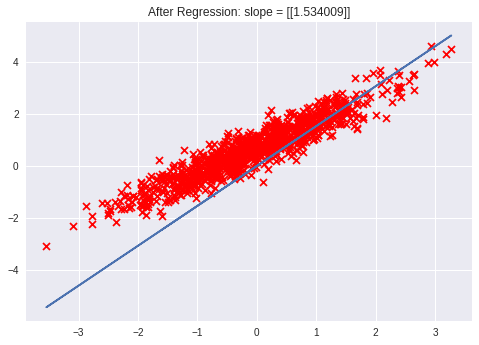

1957.6746248858742


In [0]:
#H(x) = Wx + b 에서 bias 넣어서 해보기.
#b는 y절편과 같다.
#y절편을 구하는 법 - y평균에서 x평균과 기울기의 곱을 빼면 b값이 나온다! b = (1/m*(y1+y2+...+yn)) - (1/m*(x1+x2+...+xn)*W)

#Linear Regression
#numpy는 numerical python의 약자
#matplotlib는 그래프를 그려주는 시각화 package

import numpy as np
import matplotlib.pyplot as plt

def data_generate(num_points):
  vectors_set = []                               #벡터가 들어갈 빈 리스트 생성
  for i in range(num_points):                    #i가 0부터 입력받은 num_points 값까지 돌아감
    x1 = np.random.normal(0.0, 1.0)              #x1에 0부터 1까지 랜덤값 대입. random.normal을 사용하면 random.random과는 다르게 표준편차를 이용해 random값을 돌린다.
    y1 = x1 + 0.7 + np.random.normal(0.0, 0.4)   #y1에 0.7*x1*0.0~0.4랜덤값 대입, 임의로 짠 함수.
    vectors_set.append([x1, y1])                 #x1과 y1을 비어있는 vectors_set 리스트 안에 넣어준다.
    
  x_data = np.array([v[0] for v in vectors_set]) #for문 리스트내포를 사용해 x_data에 v[0]을 vectors_set의 v만큼 넣어준다..
  y_data = np.array([v[1] for v in vectors_set]) #for문 리스트내포를 사용해 y_data에 v[1]을 vectors_set의 v만큼 넣어준다..
  
  return x_data, y_data

#편미분
def function(x, w):
  return np.sum(np.matmul(x, w))           #function함수는 x와 w 행렬을 곱한것의 배열원소 간 합해줌. 왜 np.sum을 해주냐면 값들을 다 더해서 차이값을 도출해내기 위해서.

#수치적 gradient를 구하는 법
#W 행렬을 업데이트
def numerical_gradient(f, X, W):
  h = 1e-4                                    #h = 0.0001
  grad = np.zeros_like(W)                     #W와 shape이 같은 요소가 0으로 가득 찬 array 생성
  
  for idx in range(W.size):                   #idx를 0~W.size만큼 반복
    tmp_val = W[idx]
    
    W[idx] = tmp_val + h
    fxh1 = f(X, W)
    
    W[idx] = tmp_val - h
    fxh2 = f(X, W)
    
    grad[idx] = (fxh1 - fxh2) / (2*h)         #중앙차분 이용해 미분값을 구함.
    W[idx] = tmp_val
    
  return grad

def GradientDescent(X, Y, W, b, lr, num_iters, momentum_range, mu):          #경사하강법
  m = np.size(Y)                                                          #m에 Y값의 사이즈 입력해 1/m이 가능하게 해줌
  #X의 shape은 (100, 1)    W의 shape은 (1, 1)    H_x는 (100, 1)    H_x = Wx로 가설을 잡은 경우(bias는 뺐으니 알아서 추가해서 값 확인해보기)
  H_x = np.matmul(X, W) + b                                               #H(x) = Wx+b
  cost1 = Cost(W, X, Y, b)                                                   #cost1에 Cost함수를 이용해서 값을 넣어줌. 
  
  #cost값이 더이상 감소되지 않아서 weight(계수)업데이트가 안될 때
  moment_cnt = 0                            #moment vector(학습에 도움을 주는 벡터). moment_cnt를 0으로 설정.
  v = np.array([0])                         #v에 0 하나 있는 벡터 설정.
  
  for i in range(0, num_iters):             #gradient를 구해주는 cost2
    #momentum version                       #momentum : (일의 진행에 있어서의)탄력, 가속도, 운동량
    W_temp = (lr/m) * numerical_gradient(function, X, W)  #lr은 learning rate이다. 
    v_prev = v                              #이전의 v값을 미리 v_prev에 저장해두고
    v = mu*v - W_temp
    cost2 = Cost(v, X, Y, b)

    '''
    #vanilla version  : 바닐라버젼이란 기본, 날것, 평범한 등의 뜻의 바닐라. 즉 순정버전이라고 생각하면 편할 듯 하다.
    W_temp = (lr/m) * numerical_gradient(function, X, W)
    cost2 = Cost(W, X, Y)
    '''

    if i%100 == 0:                          #i를 100으로 나눈 나머지가 0이면 (i가 100으로 나누어 떨어지면)
      print('cost1 : ', cost1, 'cost2 : ', cost2)
    
    #c1과 c2를 비교해 Cost가 더 작은걸 넣기
    if cost1 > cost2 :                      #cost1이 cost2보다 클 때
      cost1 = cost2                         #cost1에 cost2의 값을 저장
    
      '''
      momentum version
      W = W - mu*v_prev + (1+mu)*v
      '''

      #vanilla version
      W = W - W_temp
      
  print('Weight : ', W)
  return W
  
  
def Cost(W, X, Y, b):                          #cost에 대입할 Cost함수
  m = Y.size
  H_x = np.matmul(X, W) + b
  
  return np.sum(np.power(np.subtract(H_x, Y), 2)) / (2*m)       #np.subtract(H_x, y) = H_x 에서 Y의 각 배열원소를 뺀 것. np.power를 사용해 각 원소에 2제곱을 해줌. 그걸 2m으로 나눔.


#여러 실험으로 좋은 결과물을 도출해보자, 하이퍼파라미터를 바꿔가면서 결과물 도출
num_points = 1000
lr = 0.001
num_iters = 1000
momentum_range = np.array([0.0, 0.005])
mu = 0.9
  
#data 생성
X, Y = data_generate(num_points)
  
#array의 shape를 맞춰주자
m = X.size
X = np.reshape(X, (m,1))       #np.reshape도 가능, .reshape도 가능. 두가지 문법 전부 알아두자.
  
#W는 1로 초기화(우리가 업데이트해야함)
#W = np.reshape(np.ones(1), (1, 1))
#W 를 0~1 사이 random하게 초기화 했을 때
W = np.reshape(np.random.normal(0.0, 1.0), (1, 1))               #W를 0~1사이의 랜덤한 값 중 표준편차를 이용해(random.normal을 이용하면 random.random과는 달리 표준편차를 이용해 랜덤값을 기입한다.) 1x1의 W 벡터를 만듬
b = np.reshape(np.random.normal(0.0, 1.0), (1, 1))               #b도 마찬가지로 초기화.

W = GradientDescent(X, Y, W, b, lr, num_iters, momentum_range, mu)
  
Cost(W, X, Y, b)

plt.scatter(np.array(X), np.array(Y), marker = 'x', color = 'r')    #Y데이터를 그래프에 그려줌
plt.plot(np.array(X), np.array(np.matmul(X, W)))                   #함수를 그려줌, x, y축 값 지정
plt.title("After Regression: slope = " + str(W))
plt.show()

print(Cost(W, X, Y, b))
